In [14]:
# CLASSIFIER
# BASED ON GERON (2017)

from sklearn.datasets import fetch_mldata
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.base import BaseEstimator
import matplotlib
import matplotlib.pyplot as plt

import numpy as np



In [2]:
# OBTAIN

mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

# EXPLORE
X.shape

In [4]:
y.shape

(70000,)

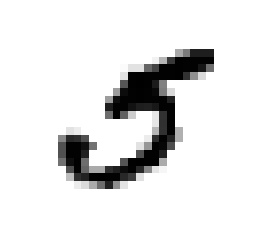

In [7]:
# EXPLORE
# LOOK AT ONE SAMPLE FROM SET
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


In [20]:
# SCRUB
# BREAK OUT INTO TRAIN AND TEST
# FIRST 60K FOR TRAIN - LAST 10K FOR TEST

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000) # USE SHUFFLE INDEX TO REORDER - DEFAULT ORDER IS GROUPED BY DIGIT
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


In [11]:
# CREATE A TWO CLASS SET FROM MNIST
# EITHER FIVE (5) OR NOT FIVE (5)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [12]:
# DEFINE STOCHASTIC GRADIENT DESCENT CLASSIFIER
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

# CAN THE CLASSIFIER IDENTIFY IF some_digit IS A FIVE

sgd_clf.predict([some_digit])

C:\Users\datab\AppData\Local\conda\conda\envs\MyWindowsCV\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ True], dtype=bool)

In [13]:
# USE CROSS VALIDATION TO LOOK AT ACCURACY
# ACCURACY IS 
# RESULTING ARRAY WILL SHOW ACCURACY FOR EACH ITERATION

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.94905,  0.9215 ,  0.95745])

In [17]:
# MODEL
# DEFINE NEW CLASSIFIER

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.90775,  0.91085,  0.91035])

In [19]:
# MODEL
# LOOK AT CONFUSION MATRIX - 
# TP   
# 

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[51869,  2710],
       [  730,  4691]], dtype=int64)